In [7]:
import pandas as pd
import matplotlib.pyplot as plt
#import decartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [19]:
path = "Rat_Sightings.csv"
df = pd.read_csv(path)

df = df[["Created Date", "Closed Date", "Location Type", "Incident Zip", "Incident Address", "City", "Borough", "Latitude", "Longitude", "Location"]]
display(df)

df['Location Type'].unique()

df['Borough'].unique()


,Created Date,Closed Date,Location Type,Incident Zip,Incident Address,City,Borough,Latitude,Longitude,Location
0,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,3+ Family Mixed Use Building,10006.0,NaN,NEW YORK,MANHATTAN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,Commercial Building,10306.0,2270 HYLAN BOULEVARD,STATEN ISLAND,STATEN ISLAND,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,09/04/2015 12:00:00 AM,NaN,1-2 Family Dwelling,10310.0,758 POST AVENUE,STATEN ISLAND,STATEN ISLAND,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,BROOKLYN,BROOKLYN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,BRONX,BRONX,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"
...,...,...,...,...,...,...,...,...,...,...
101909,02/15/2017 12:00:00 AM,01/31/2017 12:00:00 AM,3+ Family Mixed Use Building,11207.0,2515 ATLANTIC AVENUE,BROOKLYN,BROOKLYN,40.675635,-73.901327,"(40.67563538613833, -73.90132744872707)"
101910,02/14/2017 12:00:00 AM,02/23/2017 12:00:00 AM,3+ Family Apt. Building,11233.0,829 HALSEY STREET,BROOKLYN,BROOKLYN,40.685525,-73.919406,"(40.685525167695936, -73.91940607172907)"
101911,02/14/2017 12:00:00 AM,02/16/2017 12:00:00 AM,3+ Family Mixed Use Building,11213.0,98 ALBANY AVENUE,BROOKLYN,BROOKLYN,40.677325,-73.938679,"(40.67732468990624, -73.93867870955741)"
101912,02/14/2017 12:00:00 AM,01/17/2017 12:00:00 AM,1-2 Family Dwelling,11105.0,22-68 46 STREET,Astoria,QUEENS,40.769171,-73.903860,"(40.76917070274182, -73.90386041412091)"


array(['MANHATTAN', 'STATEN ISLAND', 'BROOKLYN', 'BRONX', 'QUEENS',
       'Unspecified'], dtype=object)

Text(0.5, 1.0, 'NYC Rat Incident Heatmap')

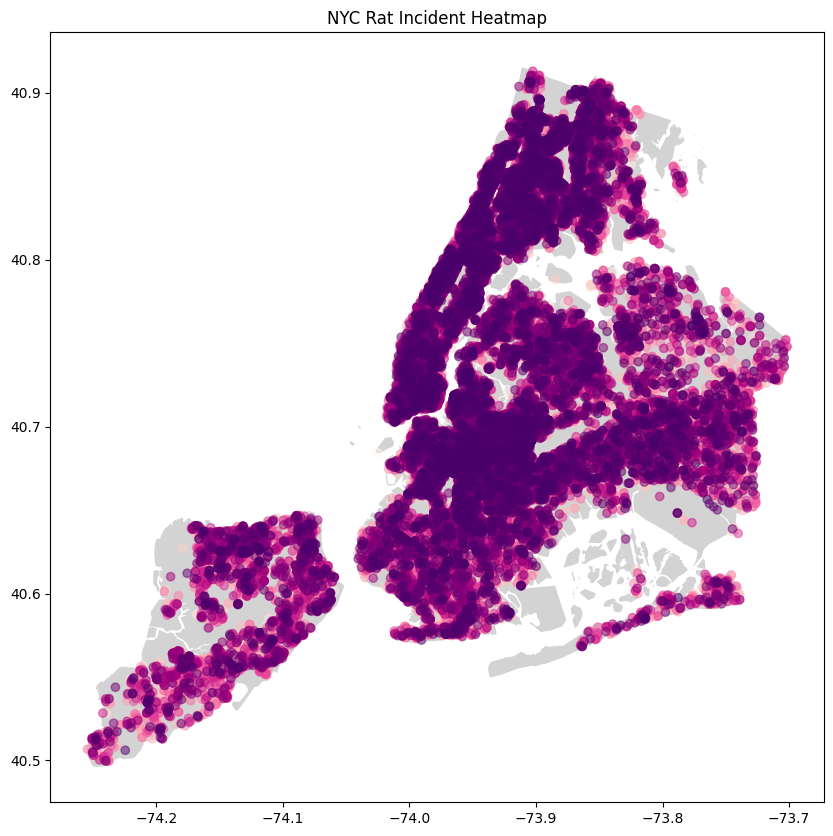

In [42]:
#crs = {"init": "epsg:4326"}
#geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
#geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)

street_map = gpd.read_file("nyu_2451_34490")

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, 
                          crs = ('EPSG:4326'), 
                          geometry = geometry)

fig, ax = plt.subplots(figsize = (10,10))
street_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(ax=ax, cmap = 'RdPu', alpha = .5)

ax.set_title('NYC Rat Incident Heatmap')